<a href="https://colab.research.google.com/github/Madhan-sukumar/Deep-Learning/blob/main/pytorch/Pytorch_Autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is autograd in Pytorch?

The autograd is nothing but the automatic differentiation engine which powers the training of neural networks. In short we can say the its a engine for calculating the derivatives (dy/dx) which records or stores a graph of all the operations which are performed on the gradient enabled tensor and then creating an acyclic graph which is called dynamic computational graph. Here the roots are the output tensors where the leaves are the input tensors. 

**Gradient:**
The calculation of gradient is done by tracing the graph from the root to the leaf and then multiplying every gradient in the way using the chain rule.

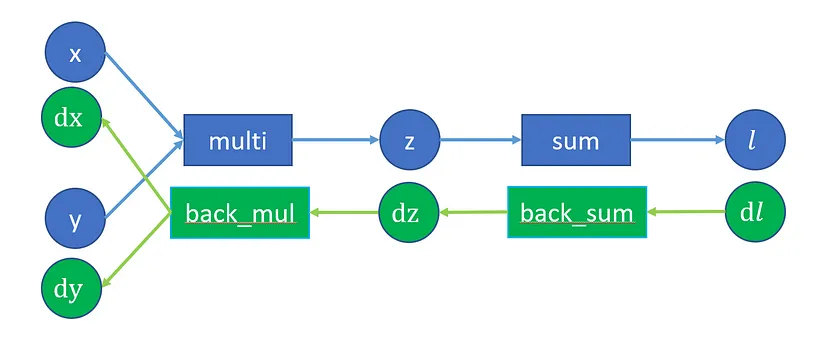




Based on the chain rule, we can imagine each variable (x, y, z, l) is associated with its gradient, and here we denote it as (dx, dy, dz, dl). As the last variable of l is the loss with respect to input weights 



**Backpropagation** is used to calculate the gradients of the loss with respect to the input weights to later update the weights and eventually reduce the loss. back propagation is just fancy name for the chain rule.

The change in the loss for a small change in an input weight is called the gradient of that weight and is calculated using backpropagation. The gradient is then used to update the weight using a learning rate to overall reduce the loss and train the neural net.

**requires_grad**: This member, if true starts tracking all the operation history and forms a backward graph for gradient calculation. For an arbitrary tensor a It can be manipulated in-place as follows: a.requires_grad_(True).

**.backward()** : to initiate the backward pass and pytorch will automatically calculate the local gradient and backward pass to compute the loss with respect to intitial weight

**grad**: grad holds the value of gradient. If requires_grad is False it will hold a None value. Even if requires_grad is True, it will hold a None value unless .backward() function is called from some other node. For example, if you call out.backward() for some variable out that involved x in its calculations then x.grad will hold ∂out/∂x.

**grad_fn**: This is the backward function used to calculate the gradient.For example, for a forward operation (function)Mul a backward operation (function) called MulBackwardis dynamically integrated in the backward graph for computing the gradient.



In [ ]:
import torch

In [ ]:
#requires_grad must be specified to calculate gradients, it controls whether tensor requires gradients or not
# Is True if gradients need to be computed for this Tensor, False otherwise
x = torch.rand(5,requires_grad=True)
print(x)

#we did backpropagation, here y is the bp for x so it is addition backwards
y = x+2
print(y)

#we did backpropagation so it is multiplication backwards
z= y*y*2
print(z)

#mean backwards
c = z.mean()
print(c)

tensor([0.0726, 0.0634, 0.7871, 0.5261, 0.2040], requires_grad=True)
tensor([2.0726, 2.0634, 2.7871, 2.5261, 2.2040], grad_fn=<AddBackward0>)
tensor([ 8.5911,  8.5150, 15.5358, 12.7626,  9.7152], grad_fn=<MulBackward0>)
tensor(11.0240, grad_fn=<MeanBackward0>)


##To see the gradients

In [ ]:
# 1. works only on scalar value (1 value) and the final value on the operation most of the time is scalar, here the scalar is "c"
# dc/dx
c.backward() #to calculate the gradients
print(x.grad)  #to print the gradients

#2. if the tensor is vector not a scalar, need to create a vector of same size to see gradient,here the final vector is "z"
# in background vector jacobian vector product is taking place
# v = torch.tensor([0.1,1.0,0.001,1.0,0.1],dtype=torch.float32)
# z.backward(v) #dz/dx
# print(x.grad)



tensor([1.6581, 1.6507, 2.2297, 2.0209, 1.7632])


### HOW PYTORCH FROM TRACKING THE GRADIENTS AND CALCULATING THE grad_fn 

From below methods we can stop PyTorch from tracking the history and forming the backward graph and cut it from the computational graph. it set requires_grad to False and will create a new tensor

In [ ]:
# can use three options
# x.requires_grad_(False)
# x.detach() - Returns a new Tensor, detached from the current graph. The result will never require gradient.
# with torch.no_grad(): - wrap it with "with" statement 

x = torch.rand(5,requires_grad=True)
print(x)

# 1.x.requires_grad_(False) #doen't produce gradient
x.requires_grad_(False)
print(x)

# 2.x.detach() - Returns a new Tensor, detached from the current graph. The result will never require gradient.
y = x.detach()  #same value but doesn't require gradient
print(y)

# 3.with torch.no_grad(): - wrap it with "with" statement 
with torch.no_grad():
  # usually before optimization for next iteration, we must empty the gradients
  x.grad.zero_()
  y=x+2
  print(y)

tensor([0.0712, 0.6079, 0.0121, 0.8741, 0.8597], requires_grad=True)
tensor([0.0712, 0.6079, 0.0121, 0.8741, 0.8597])
tensor([0.0712, 0.6079, 0.0121, 0.8741, 0.8597])
tensor([2.0712, 2.6079, 2.0121, 2.8741, 2.8597])
